In [1]:
! pip3 install imutils

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import imutils
from skimage.metrics import structural_similarity as ssim
import urllib

In [11]:
req = urllib.request.urlopen('https://raw.githubusercontent.com/opencv/opencv/master/samples/data/home.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv.imdecode(arr, 0) # 'Load it as grayscale'
img_gray =img.copy()


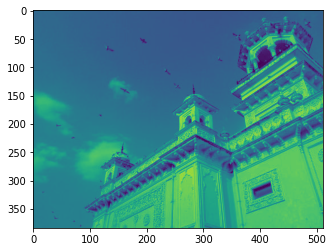

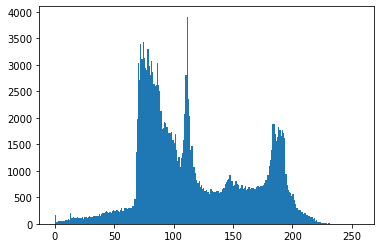

In [9]:
plt.imshow(img)
plt.figure()
plt.hist(img.ravel(),256,[0,256]); plt.show()

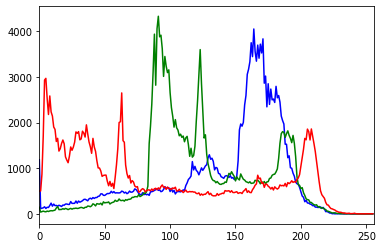

In [10]:
req = urllib.request.urlopen('https://raw.githubusercontent.com/opencv/opencv/master/samples/data/home.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv.imdecode(arr, -1) # 'Load it as grayscale'
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

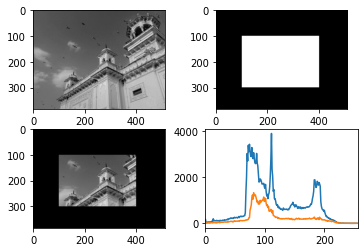

In [12]:
# create a mask
img = img_gray
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()